In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28*28).astype('float32') / 255.
x_test = x_test.reshape(10000, 28*28).astype('float32') / 255.

print('Shape of x_train: ' + str(x_train.shape)) 
print('Shape of x_test: ' + str(x_test.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of y_test: ' + str(y_test.shape))

Shape of x_train: (60000, 784)
Shape of x_test: (10000, 784)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


In [5]:
from keras.layers import Input, Dense
from keras import models

In [7]:
input_img = Input(shape=(784,))

layer1 = Dense(100, activation='relu')(input_img)
layer2 = Dense(20, activation='relu')(layer1)
layer3 = Dense(100, activation='relu')(layer2)
layer4 = Dense(784, activation='relu')(layer3)

model = models.Model(input_img, layer4)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               2100      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               79184     
Total params: 161,804
Trainable params: 161,804
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='RMSprop', loss='mean_squared_error')
history = model.fit(x_train, x_train, batch_size=128, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0367
Epoch 2/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.0270
Epoch 3/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0245
Epoch 4/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.0223
Epoch 5/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0211
Epoch 6/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0201
Epoch 7/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0195
Epoch 8/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0190
Epoch 9/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0186
Epoch 10/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0183
Epoch 11/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0181
Epoch 12/50
60000/60000 [===========================

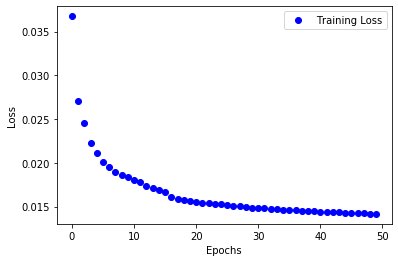

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
encoder = models.Model(input_img, layer2)
encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 20)                2020      
Total params: 80,520
Trainable params: 80,520
Non-trainable params: 0
_________________________________________________________________


In [12]:
encode_test = encoder.predict(x_test)
print('Shape of encode_test:' + str(encode_test.shape))

Shape of encode_test:(10000, 20)


In [13]:
from sklearn.manifold import TSNE

embedded_test = TSNE(n_components=2).fit_transform(encode_test)